# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

1. Condición (Antiguedad) 
2. Ubicación
3. Tipo de vivienda (PH, casa, departamento)
4. Amenities
5. M2
6. En caso de ser nuevo, si está terminado o está en construcción (pozo)
7. Calidad de materiales construcción (ej, prefabricada o concreto, etc)
8. Patio, balcón o terraza.

Por qué? 

Porque son las características más preponderantes para tazar una propiedad.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
data= pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv")

In [4]:
'''Reviso la cantidad de instancias y columnas que posee el dataset con la función shape '''

data.shape

(146660, 19)

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
'''Ejecutamos la función columns para hacer un vistazo panorámico de las columnas que tiene el dataset con el que 
vamos a trabajar.'''

data.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [ ]:
'''En ésta sección verificamos la cantidad de valores faltantes que posee cada columna. Para empezar a tener una idea de la información con la que 
vamos a trabajar.'''

data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
'''Hago un análisis de los tipos de propiedades que tiene el dataset, que es una variable importante para 
los análisis posteriores. Para hacer esto tomo la columna property_type y aplico la función value_counts 
para sumarizar cada instancia. '''

data.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

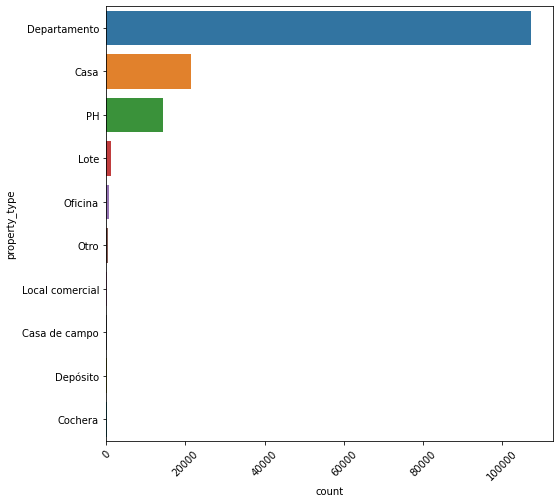

In [ ]:
'''Lo expresamos en un gráfico de barras para hacer más visible la diferenciación entre cada tipo de propiedad. 
Donde vemos que las más preponderantes son Departamento, Casa y PH. El resto de las propiedades, con mucha menor cantidad de publicaciones,
en general son para usos comerciales (oficina, depósito, etc).'''

plt.figure(figsize=(8,8))
sns.countplot(data = data, y = "property_type", order = data["property_type"].value_counts().index)
plt.xticks(rotation=45)
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [ ]:
'''Repetimos nuevamente el value_counts para verificar las regiones publicadas. '''

data.l2.value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

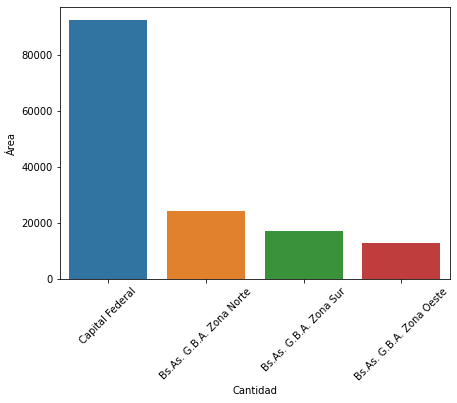

In [ ]:
'''Lo represento con un gráfico de barras a través de la función countplot, utilizando de ejes los parámetros "Área" y "Cantidad".
La zona con más publicaciones es Capital Federal, seguida por GBA Zona Norte. Zona Oeste y Zona Sur tienen una cantidad de publicaciones parejas
entre sí.'''

plt.figure(figsize=(7, 5))
sns.countplot(data = data, x = "l2", order = data["l2"].value_counts().index)
plt.xticks(rotation=45)
plt.ylabel('Área')
plt.xlabel('Cantidad')
plt.show()

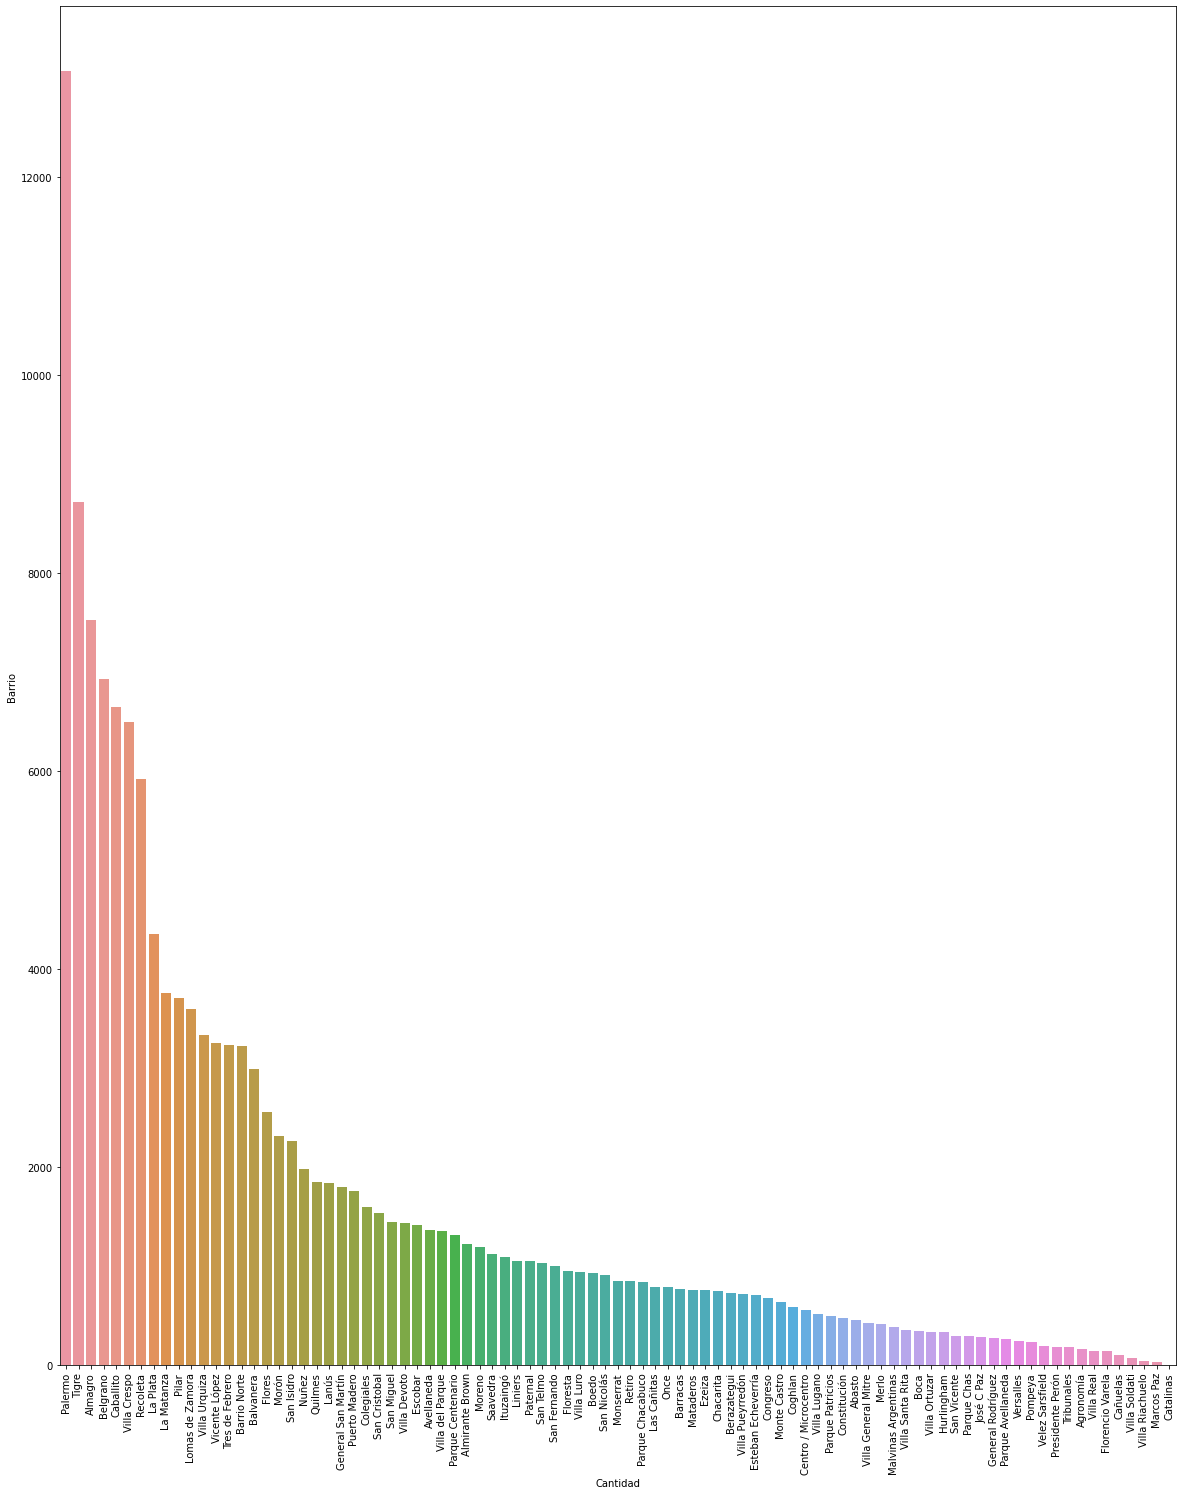

In [ ]:
''' Realizo la misma representación que anteriormente para ver los barrios con más publicaciones de avisos. El gráfico esta en orden descendente,
Palermo es el barrio con más publicaciones de todas. Dentro de Capital Federal: Palermo, Almagro y Belgrano son los tres barrios con más publicaciones.
De BsAs GBA, solamente Tigre es el único que asoma entre los primeros barrios con más publicaciones.'''

plt.figure(figsize=(20, 25))
sns.countplot(data = data, x = "l3", order = data["l3"].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Barrio')
plt.xlabel('Cantidad')
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
''' Con toda la información ya recaudada, realizo un filtro al dataset agrupando la región con propiedades 
publicadas y los tres tipos de propiedad más abundantes. Para esto utilizo la función isin para agrupar 
instancias específicas de columnas distintas. '''

nuevadata= data[(data.property_type.isin(['Casa','Departamento','PH']))&(data.l2=='Capital Federal')]
nuevadata.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
'''Al filtro anterior le aplico uno nuevo con las seis columnas que voy a trabajar de ahora en más'''

filtro1=nuevadata[['property_type','rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

In [ ]:
'''Obtengo los datos estadísticos con la función describe, para tener un primer pantallazo de la información.'''

filtro1.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


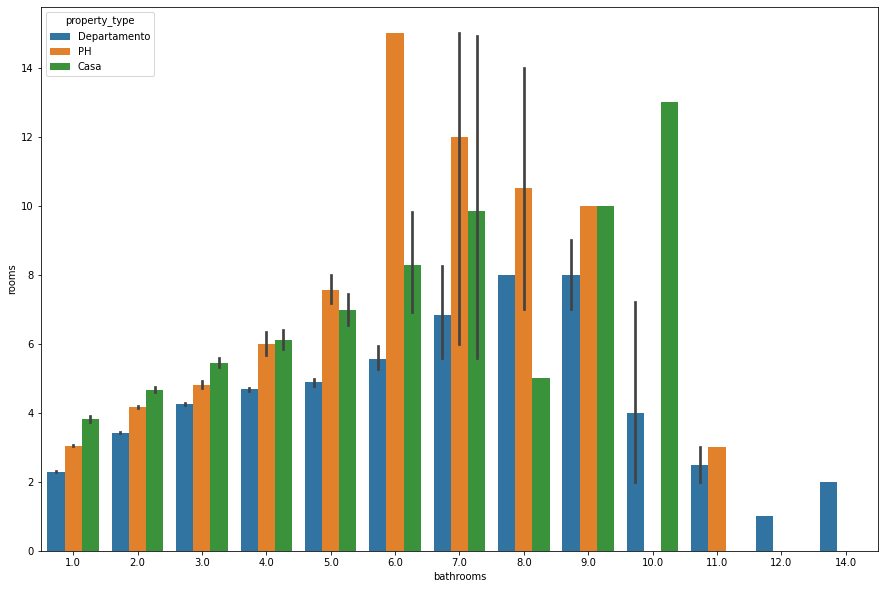

In [ ]:
'''Hago una comparación a través de un gráfico de barras (barplot), para comparar las habitaciones y los baños.
Se puede ver una tendencia de que los PH´s a más cantidad de habitaciones suele ser proporcional la cantidad
de baños. Quizás sea por ser edificaciones viejas (como suelen ser los PH) y por entonces se estilaba construir
más baños de lo que se suele hacer hoy en día con casas y departamentos.'''

plt.figure(figsize=(15, 10))
sns.barplot(data = filtro1, x = "bathrooms", y = "rooms",hue='property_type')
plt.show()

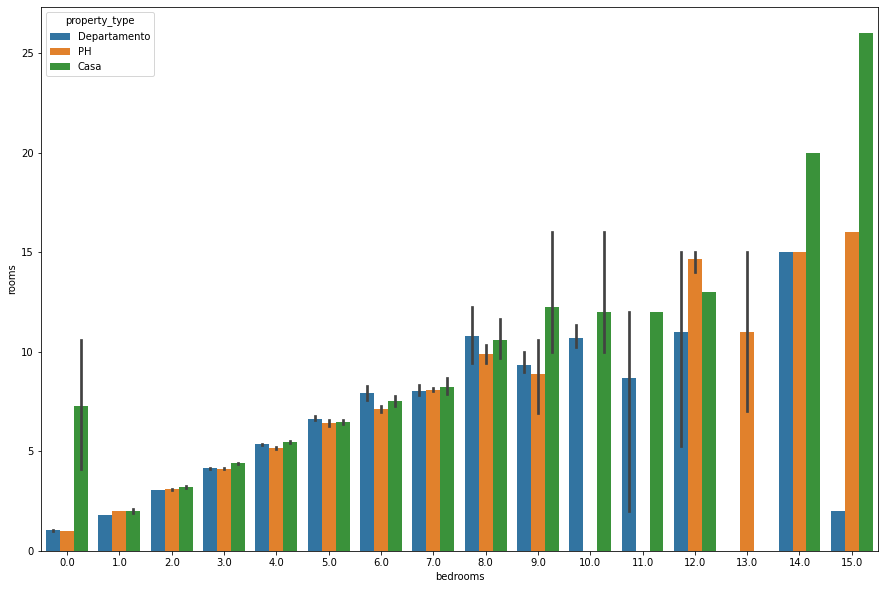

In [ ]:
'''Realizo otra comparación de barras entre la relación de los ambientes y los cuartos de los PH, Depto y Casa. 
Nuevamente observamos que a mayor cantidad de ambientes, la relación proporcional de cuartos aumenta también.
Un dato peculiar se da en la intesección de 8 ambientes y ningún cuarto para la variable Casa. Esto se debe a que
dicho campo posee varias instancias faltantes por eso se da esa rareza al visualizar el gráfico.
Mismo caso ocure para Departamento en el eje de 15 cuartos pero 3 habitaciones.'''

plt.figure(figsize=(15, 10))
sns.barplot(data = filtro1, x = "bedrooms", y = "rooms",hue='property_type')
plt.show()

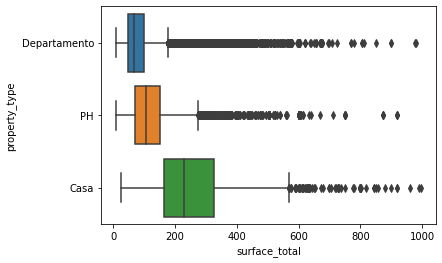

In [ ]:
'''Para visualizar variables como la superficie lo hago a través de un boxplot.
Utilicé de filtro 1000 mts para el surface_covered dado que se puede visualizar de manera más clara la mediana 
de dicha variable y los percentiles. Al tener valores atípicos (la mínima arranca en 10 y la máxima es de 126062) 
hace que el gráfico se pueda analizar mejor con un rango más acotado.
Se puede observar los outliers para dichas variables y a su vez al acotar el rango de surface se pueden hacer más visibles los boxplots. 
Como es de esperar los departamentos son, de las tres variables, los que poseen el menor rango de surface. Y por lo general, las casas ,mantienen
una disposición más grande terreno.'''

sns.boxplot(data = filtro1[filtro1.surface_total<1000], x = "surface_total", y="property_type")
plt.show()

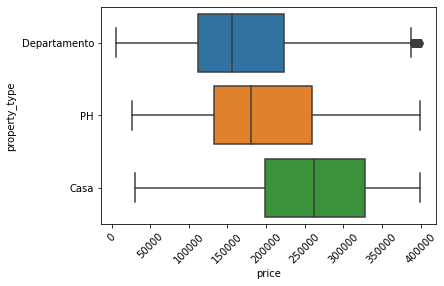

In [ ]:
'''Para analizar la variable price de los Departamento, Casa y PH realicé nuevamente un boxplot. Para poder
visualizar de una manera más clara, lo graficamos con un filtro de 400000usd para que de esta manera se pueda
apreciar en el gráfico los valores medios.
Nuevamente se observa que, como en el boxplot anterior, al ser la propiedad Casa las de mayores superficie en consecuencia tienen valores más 
elevados que las otras dos en estudio. '''

sns.boxplot(data = filtro1[filtro1.price<400000], x = "price", y="property_type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
'''Como lógicamente ocurre, no pueden existir propiedades con mayor superficie cubierta que la superficie total,
realizamos un filtro que elimine las instancias que cumplan con estas características'''

filtro1.drop(labels=filtro1.loc[filtro1.surface_covered>filtro1.surface_total].index, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
filtro1

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


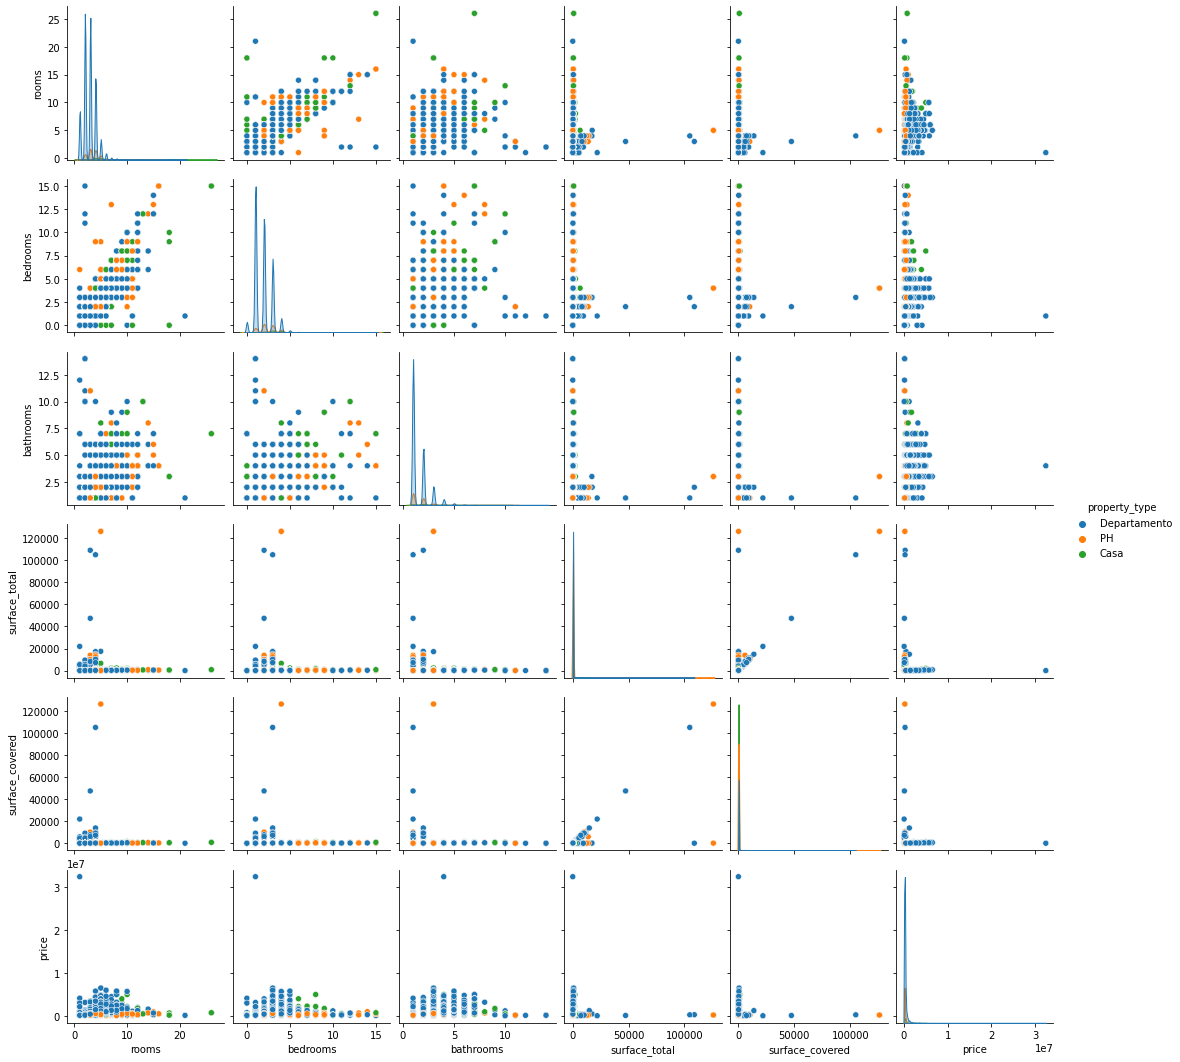

In [ ]:
'''Ahora que ya le realizamos algunos filtros para reducir la cantidad de instancias, realizo un pairplot para 
tener un rápido pantallazo. Ya se puede ir visualizando la relación entre cuartos (bedrooms) y ambientes de las propiedades (rooms).'''

sns.pairplot(filtro1, hue='property_type')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [ ]:
'''Hago la correlación entre las variables con la función corr (utilizando el metódo de medición spearman).'''

filtro1.corr(method='spearman')

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.966571,0.626570,0.838638,0.867520,0.708806
bedrooms,0.966571,1.000000,0.621037,0.818636,0.848947,0.689359
bathrooms,0.626570,0.621037,1.000000,0.685693,0.700590,0.700204
surface_total,0.838638,0.818636,0.685693,1.000000,0.957517,0.835156
surface_covered,0.867520,0.848947,0.700590,0.957517,1.000000,0.836027
price,0.708806,0.689359,0.700204,0.835156,0.836027,1.000000


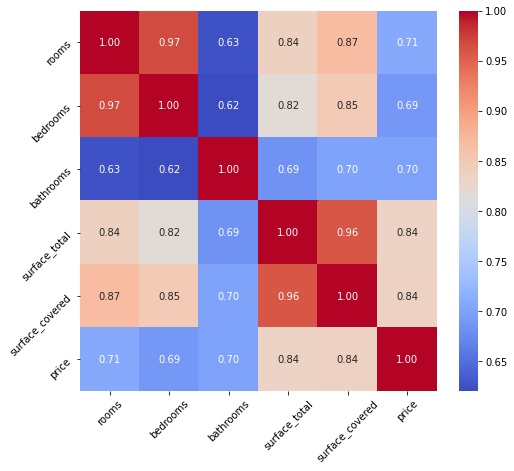

In [ ]:
'''Grafico la correlación con un gráfico de mapa de calor. Se puede ver una fuerte correlación entre ambientes y
habitaciones, claramente porque a mayor cantidad de ambientes mayor será la cantidad de cuartos. 
Pero las variables más determinantes para el precio de las propiedades son la superficie cubierta y la 
superficie total de cada inmueble. A mayor superficie, mayor será el resto de las variables, ambientes, baños,
cuartos, etc.'''

plt.figure(figsize=(8,7))
sns.heatmap(filtro1.corr(method='spearman'),annot=True,fmt='.2f', 
            xticklabels=filtro1.columns, 
            yticklabels=filtro1.columns,
            cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [ ]:
data[data == 'Capital Federal']
data.filter(items=['l3','price']).groupby('l3').median().sort_values(by='price',ascending=False).head(4)

,price
l3,
Puerto Madero,750000.0
Las Cañitas,360000.0
Recoleta,295000.0
Belgrano,265000.0


Yo elegí como pregunta alternativa que se verifique cual es el barrio más caro de Capital Federal. Es una pregunta simple y fácil de acceder pero por ejemplo la respuesta puede estar sesgada con que tal vez el barrio más caro no esté relacionado directamente con las características de la propiedad (por ejemplo, que sea un inmueble chico de surface pero igualmente es caro al estar en un barrio considerado de mejor calidad).

In [ ]:
data[data == 'Capital Federal']
data_final = data.dropna()
data_final.filter(items=['property_type','price']).groupby('property_type').max().sort_values(by='price',ascending=False).head(4)

,price
property_type,
Departamento,32434232.0
Casa,11111111.0
Otro,3500000.0
PH,1750000.0


Y también busqué la propiedad más cara de Capital Federal ya que los avisos también pueden tener otros fines como por ejemplo comerciales. 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
from numpy import nan as NA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data= pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv")

In [ ]:
'''Realizo el filtrado nuevamente al dataset para comenzar a trabajar con los datos recomendados'''

filtro_a= data[(data.property_type.isin(['Casa','Departamento','PH']))&(data.l2=='Capital Federal')]
filtro_b = filtro_a[(filtro_a.surface_total >= 15) & (filtro_a.surface_total <= 1000)]
filtro_c = filtro_b[filtro_b.price <= 4000000]
filtro_d=filtro_c[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
filtro_final = filtro_d.dropna()
filtro_final.shape

(81019, 6)

In [ ]:
'''Un rápido vistazo son la función head para visualizar el nuevo dataset ya filtrado'''

filtro_final.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


# **Benchmark **

In [ ]:
'''Para trabajar con un benchmark voy a realizar un sencillo análisis del promedio de la variable price que es la que voy a querer predecir más adelante'''

filtro_final['price'].mean()

263772.52554339106

In [ ]:
filtro_final.mean()

rooms                   3.009652
bedrooms                2.002037
bathrooms               1.553821
surface_total          95.361779
surface_covered        84.928535
price              263772.525543
dtype: float64

# **Ahora comienzo a trabajar los modelos**

In [ ]:
'''Separo del dataset en la variable X los atributos que voy a usar para predecir, y en la variable y, la etiqueta que quiero predecir'''

X = filtro_final[['rooms','bedrooms','bathrooms','surface_total','surface_covered']]
y = filtro_final.price

In [ ]:
X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0


In [ ]:
'''Separo el dataset en conjuntos de entrenamiento y testeo a través de la función train_test_split'''

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


In [ ]:
'''Voy a crear un módelo de cada uno para trabajar (Regresión Lineal, Árbol de Decisión y Vecinos más cercanos)'''

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [ ]:
'''Entreno esos modelos con la función fit'''

linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
linear_model.score(X_test, y_test)
tree_regressor.score(X_test, y_test)
knn_regressor.score(X_test, y_test)

0.7136966050304103

In [ ]:
linear_model.score(X_train, y_train)
tree_regressor.score(X_train, y_train)
knn_regressor.score(X_train, y_train)

0.8337576939918325

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807940959


# ***Métrica***

Voy a usar de métrica el Mean Squared Error (MSE) al tratarse de un problema de regresión, la considero más adecuada para estudiar la variable *precio* que intentamos predecir. 
Voy a buscar de los tres modelos con cual obtengo resultados más bajos de MSE como indicador de que funciona mejor dicho modelo.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361578


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


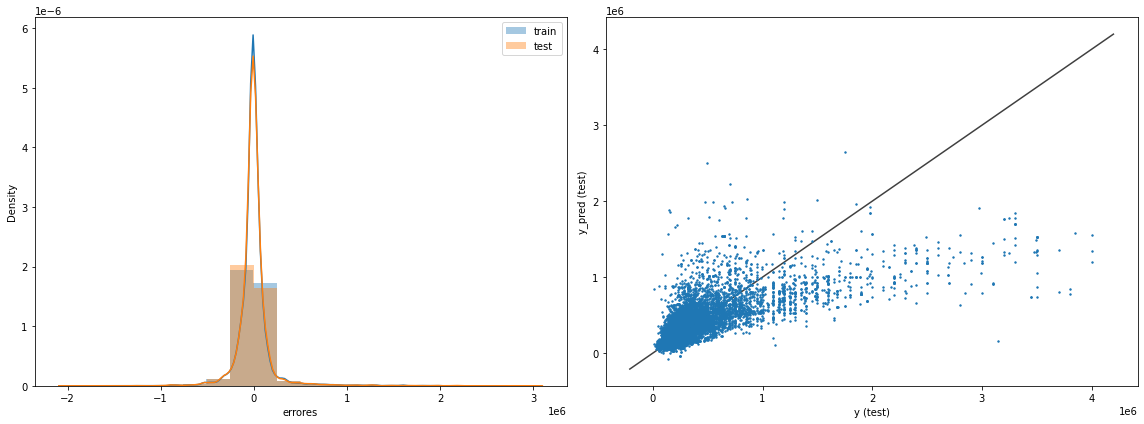

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 206608.3616898628
Raíz del error cuadrático medio en Test: 209013.62022782397


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


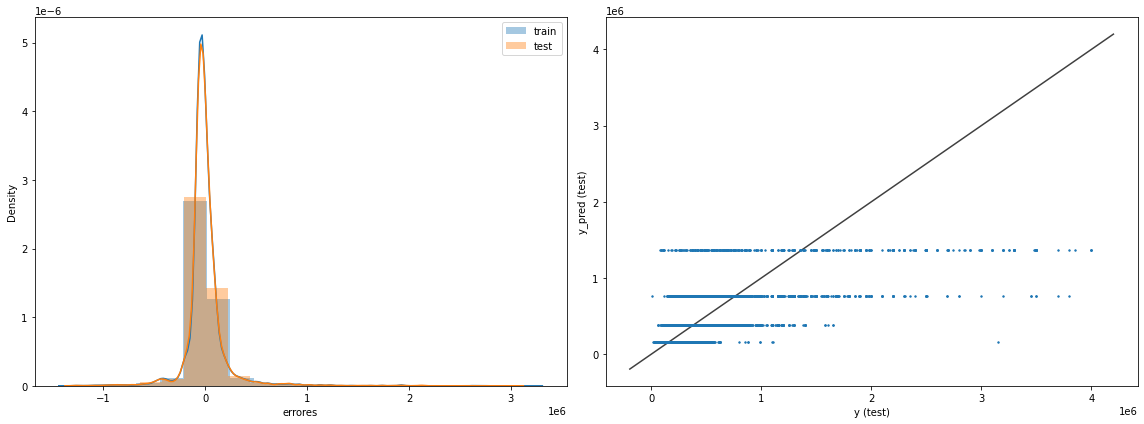

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 142074.1381975396
Raíz del error cuadrático medio en Test: 161749.10186897055


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


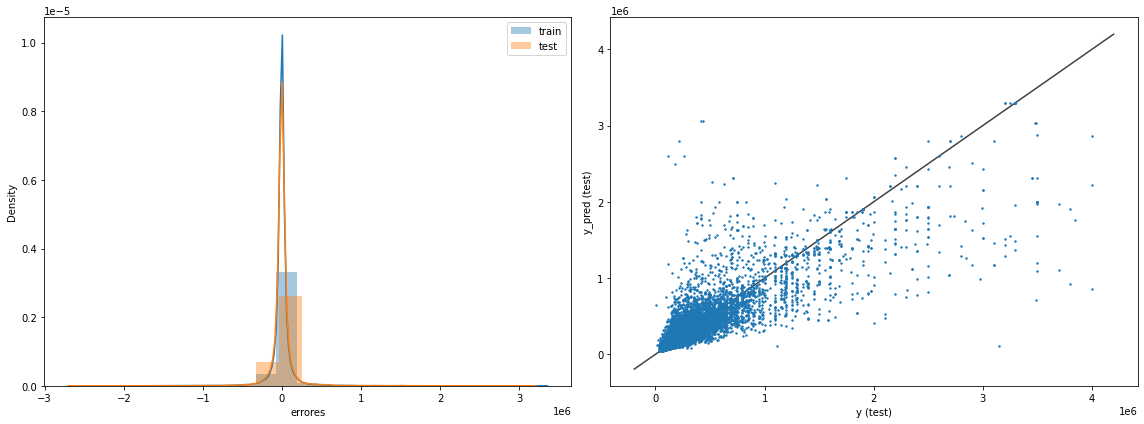

In [ ]:
'''Verificamos como son los errores obtenidos'''

from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal', 'Árbol de Decisión','Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (16,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

# **Curvas de validación**

In [ ]:
# Defino las listas vacias para los valores deseados
lista_train = []
lista_test = []

# Defino la lista de valores de max_depth que vamos a explorar
max_depths = [5,6,7,8,9,10,12,14,18,20]

# Genero en loop sobre los distintos valores de profundidad
for max_depth in max_depths:
    
    # Defino el modelo con el valor de profundidad
    tree_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
    # Entreno el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Ahora predecimos y evaluamos sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Ahora predecimos y evaluamos sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agrego la información a las listas
    lista_train.append(train_rmse)
    lista_test.append(test_rmse)

In [ ]:
lista_train

[169200.1754118897,
 159067.539460302,
 149200.5546128596,
 139064.9573938412,
 129685.36078409558,
 120797.5008434747,
 101186.65188945616,
 84661.31037160696,
 60301.53230817488,
 55906.294198892916]

Text(0, 0.5, 'RMSE')

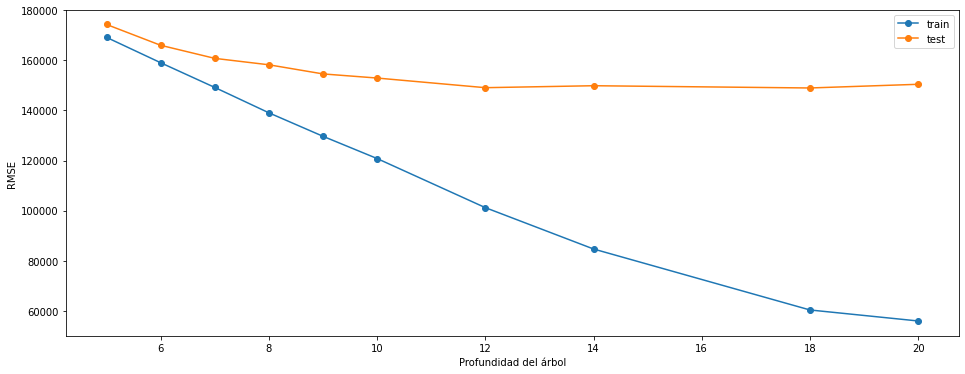

In [ ]:
'''Generamos el gráfico para visualizar la comparación y podemos ver que a mayor grado de profundidad, el árbol tiende al overfiting. Ya que para los 
datos de entrenamiento aprende cada vez mejor pero no sucede lo mismo cuando ingresamos datos nuevos a mayor nivel de profundidad'''

plt.figure(figsize = (16,6))
plt.plot(max_depths,lista_train,'o-',label='train' )
plt.plot(max_depths,lista_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')

In [ ]:
# Defino las listas vacias para los valores de accuracy deseados
lista_train = []
lista_test = []

# Defino la lista de valores de k que vamos a explorar
n_neighbors = [5,6,7,8,9,10,12,14,18,20]

# Genero en loop sobre los distintos valores de k 
for n in n_neighbors:
    
    # Defino el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors=n)
        
    # Entreno el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Ahora predimos y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Ahora predimos y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agrego la información a las listas
    lista_train.append(train_rmse)
    lista_test.append(test_rmse)

Text(0, 0.5, 'RMSE')

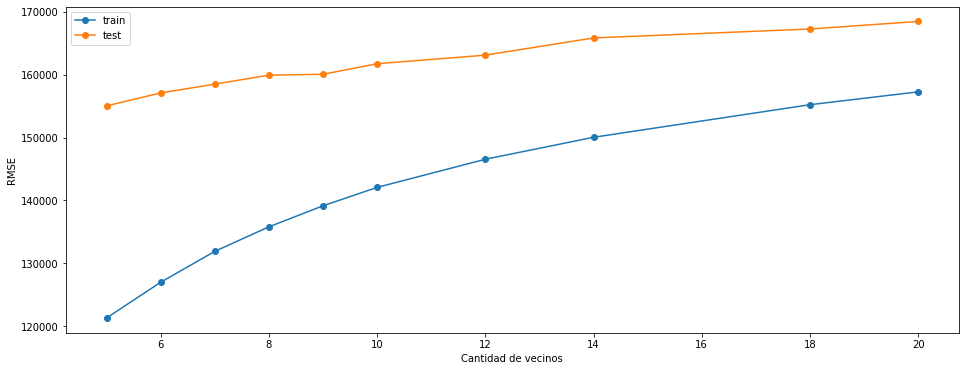

In [ ]:
'''Genero el gráfico para visualizar el resultado. Y vemos que a mayor cantidad de vecinos tiende al Overfiting, pero a menor cantidad es el modelo
que obtiene mejor resultado de los tres'''

plt.figure(figsize = (16,6))
plt.plot(n_neighbors,lista_train,'o-',label='train' )
plt.plot(n_neighbors,lista_test,'o-',label='test')
plt.legend()
plt.xlabel('Cantidad de vecinos')
plt.ylabel('RMSE')

De los modelos estudiados, observamos que el que mejor resultado obtiene de los 3 es el modelo de Vecinos más cercanos. A su vez cuando el modelo funciona muy bien con una poca cantidad de vecinos y empeora a medida que aumentamos la cantidad. Pero de todas maneras sigue como mejor opción de las 3 para realizar los análisis. 

De la información utilizada tal vez se podría incorporar las fechas para trabajar algún rango de fechas ya sea por creación o fin de creación de la propiedad.
Y considerando información repetida o de más, quizás se podría optar por solamente una variable entre surface_total y surface_covered

# **Mejorando el rendimiento de los modelos**

In [ ]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=6, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361578


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


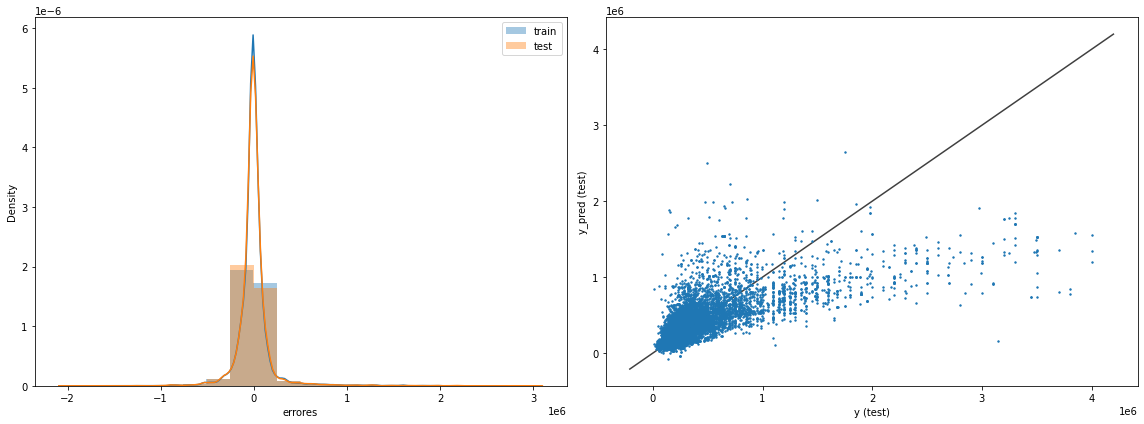

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 159067.539460302
Raíz del error cuadrático medio en Test: 166034.1200011022


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


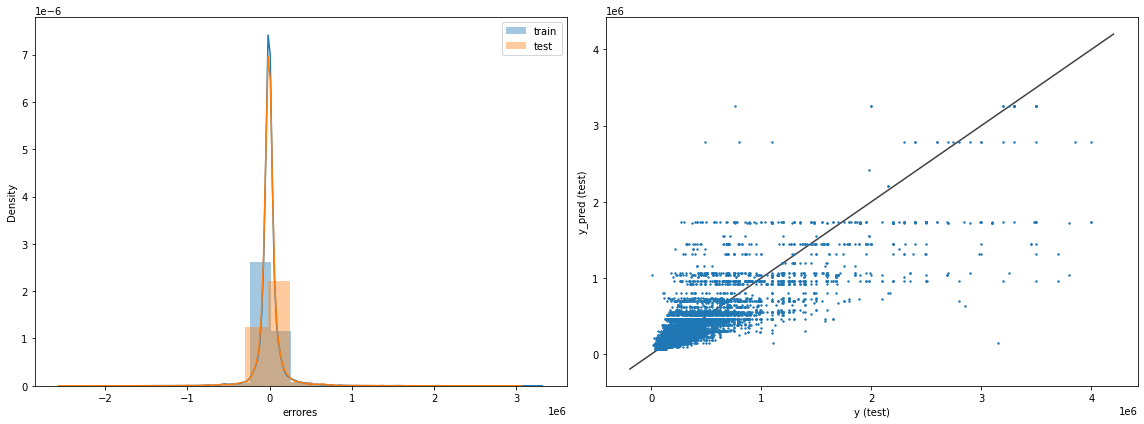

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


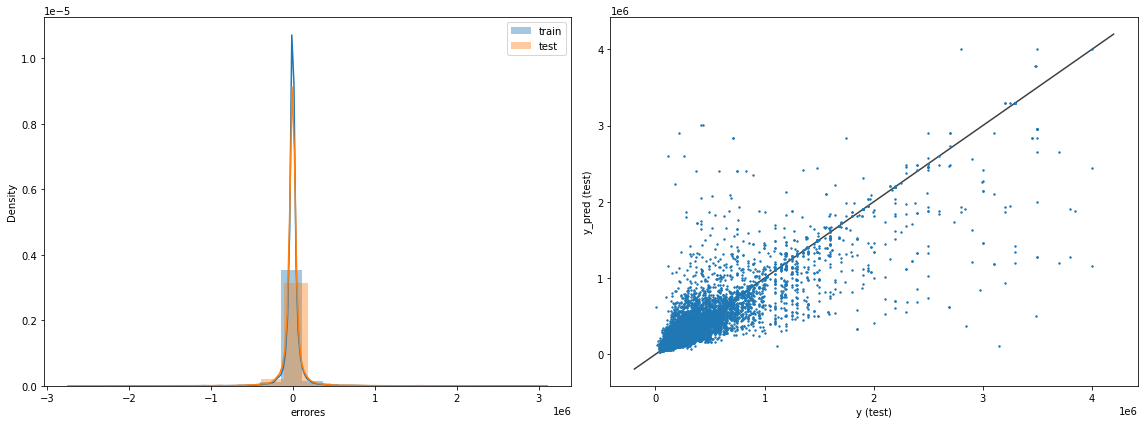

In [ ]:
modelos = ['Regresión lineal', 'Árbol de Decisión','Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (16,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()